In [1]:
import os
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

work_dir = os.path.expanduser('~/development/python/a_python_guide_to_geophysics/FernandinaSenDT128')
os.chdir(work_dir)
print('Go to directory:', work_dir)

Go to directory: /Users/yunjunz/development/python/a_python_guide_to_geophysics/FernandinaSenDT128


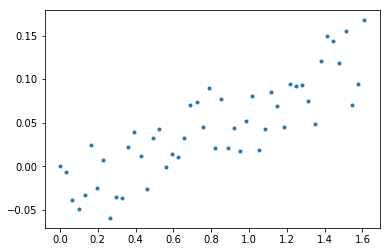

In [5]:
## simulation
vel_sim = 0.1 #m/year
num_date = 50
t = np.arange(num_date) * 12 / 365.25 + 2014.5
t -= t[0]
dis_sim = t * vel_sim + np.random.rand(num_date) * 0.1
dis_sim -= dis_sim[0]
plt.figure()
plt.plot(t, dis_sim, '.')
plt.show()

In [6]:
## solution 0 : di = ti * v + c [right]
A0 = np.ones((num_date, 2), dtype=np.float64)
A0[:, 0] = t + 2014.05
vel_est0, c0 = np.dot(np.linalg.pinv(A0), dis_sim)
#vel_est0, c0 = linalg.lstsq(A0, dis_sim, cond=1e-15)[0]
dis_est0 = (t + 2014.05) * vel_est0 + c0
print('solution 0 with velocity: {} m/year'.format(vel_est0))

solution 0 with velocity: 0.09771125409925505 m/year


In [7]:
## solution 1 : di = ti * v + c [right]
A1 = np.ones((num_date, 2), dtype=np.float32)
A1[:, 0] = t
vel_est1, c = np.dot(np.linalg.pinv(A1), dis_sim)
#vel_est1, c = linalg.lstsq(A1, dis_sim, cond=1e-15)[0]
dis_est1 = t * vel_est1 + c
print('solution 1 with velocity: {} m/year'.format(vel_est1))

solution 1 with velocity: 0.09771125344601118 m/year


In [8]:
## solution 2 : di - d1 = (ti - t1) * v [wrong]
A2 = np.array(t, dtype=np.float32).reshape(-1, 1)
vel_est2 = np.dot(np.linalg.pinv(A2), dis_sim)
#vel_est2 = linalg.lstsq(A2, dis_sim, cond=1e-15)[0]
dis_est2 = t* vel_est2
print('solution 2 with velocity: {} m/year'.format(vel_est2))

solution 2 with velocity: [0.06581752] m/year


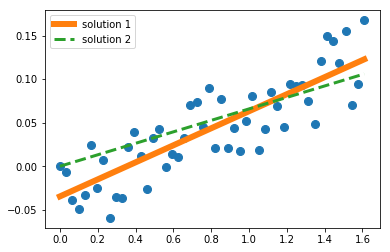

In [9]:
plt.figure()
plt.plot(t, dis_sim, '.', ms=16)
plt.plot(t, dis_est1, '-',  lw=6, label='solution 1')
plt.plot(t, dis_est2, '--', lw=3, label='solution 2')
plt.legend()
plt.show()